#### PPGIA - Unifor - Prof. Daniel - Processamento e analise de imagens digitais - Trabalho01

Conforme aula, utilizar o Colab enviado para realizar a identificação de faces em uma foto e borrar o rosto dos integrantes da foto.

#### Passo a Passo para Anonimização de Faces

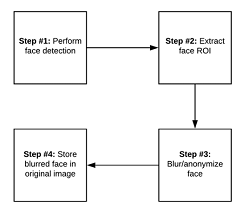

#### Importação de Bibliotecas

In [11]:
#Instalação e Import do FaceRecognition
!pip3 install face_recognition

In [12]:
import numpy as np
import pandas as pd
import cv2 
print(cv2.__version__)
#Path Google Colab para CV2
from google.colab.patches import cv2_imshow
from google.colab import files
import dlib
from skimage import io
from PIL import Image 
%matplotlib inline
#A linha acima é necessária para mostrar gráficos Matplotlib dentro de um Notebook Jupyter
from matplotlib import pyplot as plt
#import matplotlib.pylab as plt
import sys
import ipywidgets as widgets
from IPython.display import display
#import face_recognition

4.1.2


In [3]:
#Upload do arquivo de imagens que será utilizado no exemplo
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving variosrostos.jpg to variosrostos.jpg
User uploaded file "variosrostos.jpg" with length 211448 bytes


In [13]:
#Funcao para Exibir Imagens com matplotlib e cv2
def exibir_imgplt(tmpimg):
  #Importar a Imagem
  image = cv2.imread(tmpimg)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,None,fx=0.25,fy=0.25,interpolation=cv2.INTER_AREA)
  #Mostra a imagem com matplotlib
  plt.imshow(image)
  plt.show()
  return

In [14]:
#Funcao para Detectar Rostos com DLIB
def detectar_faces_dlib(tmpimg):
  
  #Importar a Imagem
  imagem = cv2.imread(tmpimg)
  imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
  imagem = cv2.resize(imagem,None,fx=0.25,fy=0.25,interpolation=cv2.INTER_AREA)
  #Detectar Face
  detector = dlib.get_frontal_face_detector()
  facesDetectadas = detector(imagem, 3)
  print(facesDetectadas)
  print("Faces detectadas: ", len(facesDetectadas))
  for face in facesDetectadas:
    x, y, x1, y1 = (int(face.left()), int(face.top()), int(face.right()), int(face.bottom()))
    cv2.rectangle(imagem, (x, y), (x1, y1), (0, 0, 255), 2)

  #Mostra a imagem com matplotlib
  plt.imshow(imagem)
  cv2.waitKey(0)
  cv2.destroyAllWindows()  
  plt.show()

  return

In [15]:
#Funcao para Anonimizar Rostos
def anonimizar_rosto(tmpimg):

  #Importar a Imagem
  imagem = cv2.imread(tmpimg)
  imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
  imagem = cv2.resize(imagem,None,fx=0.25,fy=0.25,interpolation=cv2.INTER_AREA)
  #Detectar Face
  detector = dlib.get_frontal_face_detector()
  facesDetectadas = detector(imagem, 3)
  print(facesDetectadas)
  print("Faces detectadas: ", len(facesDetectadas))
  for face in facesDetectadas:
    x, y, x1, y1 = (int(face.left()), int(face.top()), int(face.right()), int(face.bottom()))
    imagem[y:y1, x:x1] = cv2.blur(imagem[y:y1, x:x1], (25, 25))

  #Mostra a imagem com matplotlib
  plt.imshow(imagem)
  cv2.waitKey(0)
  cv2.destroyAllWindows()  
  plt.show()

  return

In [16]:
#Botão para exibir a imagem que foi realizado Upload
button = widgets.Button(description="Exibir Img CV2PLT")
output = widgets.Output()

def on_button_clicked_exibir_imagem(b):
  with output:
    print("Exibindo Imagens:")
    exibir_imgplt(next(iter(uploaded)))
button.on_click(on_button_clicked_exibir_imagem)
display(button, output)

Button(description='Exibir Img CV2PLT', style=ButtonStyle())

Output()

In [17]:
#Botão para Detectar as Faces dos rostos
button2 = widgets.Button(description="DetectarFace")
output2 = widgets.Output()

def on_button_clicked_detectar_faces_dlib(b):
  with output2:
    print("DetectarFace:")
    detectar_faces_dlib(next(iter(uploaded)))
button2.on_click(on_button_clicked_detectar_faces_dlib)
display(button2, output2)

Button(description='DetectarFace', style=ButtonStyle())

Output()

In [18]:
#Botão para anonimizar os rostos detectados
button3 = widgets.Button(description="AnonimizarRostos")
output3 = widgets.Output()

def on_button_clicked_anonimizar_rosto(b):
  with output3:
    print("Anonimizar Rostos:")
    anonimizar_rosto(next(iter(uploaded)))

button3.on_click(on_button_clicked_anonimizar_rosto)
display(button3, output3)

Button(description='AnonimizarRostos', style=ButtonStyle())

Output()